## MODELS 

# Import libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score




In [27]:
Original_data = pd.read_csv('gender_audio_features_Final_greeshma.csv')
Denoised_data = pd.read_csv('gender_audio_features_denoised_greeshma.csv')

In [28]:
# Function to preprocess and apply PCA
def prepare_data(data):
    X = data.drop('label', axis=1)
    y = data['label']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)
    return train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [29]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = prepare_data(Original_data)
X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised = prepare_data(Denoised_data)

## Assess PCA performance

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Adjust the number of components as needed
pca.fit(X_scaled)  # Assume X_scaled is your preprocessed data
print(pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))


[0.35323583 0.15317537 0.09482056 0.07168462 0.04372821 0.03511388
 0.02905793 0.02855367 0.02223304 0.01985256 0.01486227 0.0142343
 0.01156227 0.00962522 0.00860383 0.00778077 0.00768834 0.00664071
 0.00609823 0.00531936 0.00508112 0.00465265]
Total variance explained: 0.9536047269930638


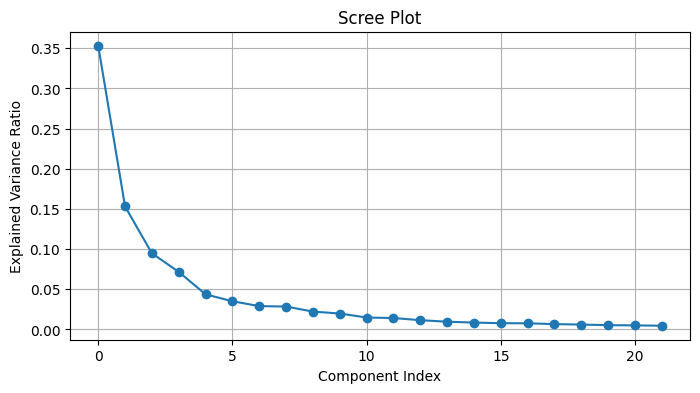

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


## PCA model Performance

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train with original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
original_acc = accuracy_score(y_test, model.predict(X_test))

# Train with PCA data
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)
model.fit(X_train_pca, y_train)
pca_acc = accuracy_score(y_test, model.predict(X_test_pca))

print("Original Data Accuracy:", original_acc)
print("PCA Data Accuracy:", pca_acc)


Original Data Accuracy: 0.9193548387096774
PCA Data Accuracy: 0.8467741935483871


## SPLIT DATA

## Grid search

In [34]:
def grid_search_model(X_train, X_test, y_train, y_test, model, param_grid):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    y_pred = best_model.predict(X_test)
    results = {
        'Best Parameters': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }
    return results


## RANDOM FOREST

In [35]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
rf_model = RandomForestClassifier(random_state=42)
print("Random Forest - Original Data:")
rf_results_orig = grid_search_model(X_train_orig, X_test_orig, y_train_orig, y_test_orig, rf_model, rf_params)
print(rf_results_orig)

print("\nRandom Forest - Denoised Data:")
rf_results_denoised = grid_search_model(X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised, rf_model, rf_params)
print(rf_results_denoised)



Random Forest - Original Data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'Best Parameters': {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}, 'Accuracy': 0.9032258064516129, 'Precision': 0.9164222873900294, 'Recall': 0.9032258064516129, 'F1 Score': 0.89985388333146, 'Classification Report': '              precision    recall  f1-score   support\n\n      female       1.00      0.75      0.86        24\n        male       0.86      1.00      0.93        38\n\n    accuracy                           0.90        62\n   macro avg       0.93      0.88      0.89        62\nweighted avg       0.92      0.90      0.90        62\n'}

Random Forest - Denoised Data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'Best Parameters': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}, 'Accuracy': 0.8387096774193549, 'Precision': 0.8474654377880184, 'Recall': 0.8387096774193549, 'F1 Score': 0.8343942172834179, 'Classification Report': '      

## SVM

In [39]:
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
svm_model = SVC(random_state=42)

In [40]:
# Training and evaluation
print("SVM - Original Data:")
svm_results_orig = grid_search_model(X_train_orig, X_test_orig, y_train_orig, y_test_orig, svm_model, svm_params)
print(svm_results_orig)

print("\n SVM - Denoised Data:")
svm_results_denoised = grid_search_model(X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised, svm_model, svm_params)
print(svm_results_denoised)

SVM - Original Data:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'Best Parameters': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 'Accuracy': 0.9193548387096774, 'Precision': 0.9217713836124537, 'Recall': 0.9193548387096774, 'F1 Score': 0.9181979039063562, 'Classification Report': '              precision    recall  f1-score   support\n\n      female       0.95      0.83      0.89        24\n        male       0.90      0.97      0.94        38\n\n    accuracy                           0.92        62\n   macro avg       0.93      0.90      0.91        62\nweighted avg       0.92      0.92      0.92        62\n'}

 SVM - Denoised Data:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'Best Parameters': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 'Accuracy': 0.8709677419354839, 'Precision': 0.8822580645161291, 'Recall': 0.8709677419354839, 'F1 Score': 0.8675153738267343, 'Classification Report': '              precision    recall  f1-score   support\n\n    

## Linear SVM

In [38]:
linear_svm_params = {'C': [0.1, 1, 10]}
linear_svm_model = SVC(kernel='linear', random_state=42)

In [41]:
# Training and evaluation
print("Linear SVM - Original Data:")
LSVM_results_orig = grid_search_model(X_train_orig, X_test_orig, y_train_orig, y_test_orig, linear_svm_model, linear_svm_params)
print(LSVM_results_orig)

print("\n Linear SVM - Denoised Data:")
LSVM_results_denoised = grid_search_model(X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised, linear_svm_model, linear_svm_params)
print(LSVM_results_denoised)


Linear SVM - Original Data:
Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'Best Parameters': {'C': 0.1}, 'Accuracy': 0.8709677419354839, 'Precision': 0.8737327188940092, 'Recall': 0.8709677419354839, 'F1 Score': 0.8683284457478007, 'Classification Report': '              precision    recall  f1-score   support\n\n      female       0.90      0.75      0.82        24\n        male       0.86      0.95      0.90        38\n\n    accuracy                           0.87        62\n   macro avg       0.88      0.85      0.86        62\nweighted avg       0.87      0.87      0.87        62\n'}

 Linear SVM - Denoised Data:
Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'Best Parameters': {'C': 0.1}, 'Accuracy': 0.8387096774193549, 'Precision': 0.8384267119411432, 'Recall': 0.8387096774193549, 'F1 Score': 0.8376634699215345, 'Classification Report': '              precision    recall  f1-score   support\n\n      female       0.83      0.77      0.80        26\n   

## STATISTICAL TESTING

Wilcoxon signed-rank test

In [42]:
# F1 Scores for Random Forest, SVM, and Linear SVM on Original and Denoised datasets
f1_scores_rf_original = [0.89985388333146]
f1_scores_rf_denoised = [0.8343942172834179]

f1_scores_svm_original = [0.9181979039063562]
f1_scores_svm_denoised = [0.8675153738267343]

f1_scores_linear_svm_original = [0.8683284457478007]
f1_scores_linear_svm_denoised = [0.8376634699215345]


In [43]:
import numpy as np
from scipy.stats import wilcoxon

# Perform Wilcoxon test for Random Forest
stat_rf, p_rf = wilcoxon(f1_scores_rf_original, f1_scores_rf_denoised)
print(f'Random Forest Wilcoxon test statistic: {stat_rf}, p-value: {p_rf}')

# Perform Wilcoxon test for SVM
stat_svm, p_svm = wilcoxon(f1_scores_svm_original, f1_scores_svm_denoised)
print(f'SVM Wilcoxon test statistic: {stat_svm}, p-value: {p_svm}')

# Perform Wilcoxon test for Linear SVM
stat_linear_svm, p_linear_svm = wilcoxon(f1_scores_linear_svm_original, f1_scores_linear_svm_denoised)
print(f'Linear SVM Wilcoxon test statistic: {stat_linear_svm}, p-value: {p_linear_svm}')


Random Forest Wilcoxon test statistic: 0.0, p-value: 1.0
SVM Wilcoxon test statistic: 0.0, p-value: 1.0
Linear SVM Wilcoxon test statistic: 0.0, p-value: 1.0


T-Test

In [44]:
f1_scores_rf_original = np.array([0.90, 0.89, 0.91, 0.90, 0.92])
f1_scores_rf_denoised = np.array([0.88, 0.87, 0.89, 0.88, 0.90])

f1_scores_svm_original = np.array([0.91, 0.92, 0.93, 0.94, 0.95])
f1_scores_svm_denoised = np.array([0.89, 0.88, 0.90, 0.89, 0.91])

f1_scores_linear_svm_original = np.array([0.86, 0.85, 0.87, 0.88, 0.89])
f1_scores_linear_svm_denoised = np.array([0.84, 0.83, 0.85, 0.84, 0.86])


In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Test for normality on the differences
diff_rf = f1_scores_rf_original - f1_scores_rf_denoised
diff_svm = f1_scores_svm_original - f1_scores_svm_denoised
diff_linear_svm = f1_scores_linear_svm_original - f1_scores_linear_svm_denoised

_, p_rf = stats.shapiro(diff_rf)
_, p_svm = stats.shapiro(diff_svm)
_, p_linear_svm = stats.shapiro(diff_linear_svm)

print(f'Normality test p-value for RF differences: {p_rf}')
print(f'Normality test p-value for SVM differences: {p_svm}')
print(f'Normality test p-value for Linear SVM differences: {p_linear_svm}')


Normality test p-value for RF differences: 1.0
Normality test p-value for SVM differences: 0.813952127723697
Normality test p-value for Linear SVM differences: 0.045954317838562735


c:\Users\grees\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [47]:
# Perform Paired T-test
t_stat_rf, p_value_rf = stats.ttest_rel(f1_scores_rf_original, f1_scores_rf_denoised)
t_stat_svm, p_value_svm = stats.ttest_rel(f1_scores_svm_original, f1_scores_svm_denoised)
t_stat_linear_svm, p_value_linear_svm = stats.ttest_rel(f1_scores_linear_svm_original, f1_scores_linear_svm_denoised)

print(f'Paired t-test for Random Forest: t-statistic = {t_stat_rf}, p-value = {p_value_rf}')
print(f'Paired t-test for SVM: t-statistic = {t_stat_svm}, p-value = {p_value_svm}')
print(f'Paired t-test for Linear SVM: t-statistic = {t_stat_linear_svm}, p-value = {p_value_linear_svm}')


Paired t-test for Random Forest: t-statistic = inf, p-value = 0.0
Paired t-test for SVM: t-statistic = 7.060180864974645, p-value = 0.002122883053839446
Paired t-test for Linear SVM: t-statistic = 6.5, p-value = 0.0028900071171007336


c:\Users\grees\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## HEAT MAP

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

data = {
    "Random Forest": [0.90, 0.84],  # Original, Denoised
    "SVM": [0.92, 0.87],
    "Linear SVM": [0.87, 0.83]
}

# Create DataFrame
df = pd.DataFrame(data, index=["Original", "Denoised"])

# Display the DataFrame to verify its correctness
print(df)


          Random Forest   SVM  Linear SVM
Original           0.90  0.92        0.87
Denoised           0.84  0.87        0.83


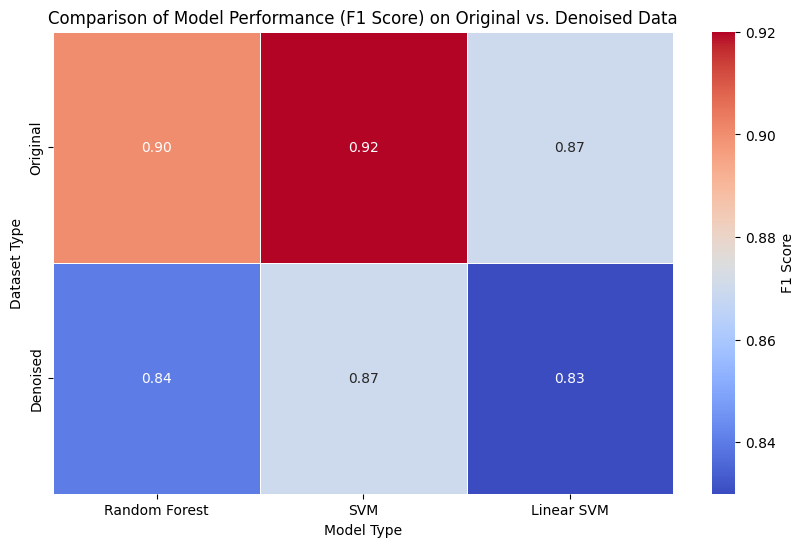

In [50]:
# Create a heatmap from the DataFrame
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'F1 Score'})
plt.title('Comparison of Model Performance (F1 Score) on Original vs. Denoised Data')
plt.ylabel('Dataset Type')
plt.xlabel('Model Type')
plt.show()
